<a href="https://colab.research.google.com/github/SupremeEvilGod/ML3-Stock-Price-Prediction-Using-Linear-Regression/blob/main/ML3-Stock-Price-Prediction-Using-Linear-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Creation(Stock Market Data (Financial Data))

In [1]:
import yfinance as yf
#if yfinance is not installed just install it by the command pip install yfinance
# Fetch real-time stock data for a specific company (e.g., Apple)
data = yf.download('AAPL', period='1d', interval='1m')

# Let's check the first few rows of the stock data
print(data.head())


[*********************100%***********************]  1 of 1 completed

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-09-18 09:30:00-04:00  218.250000  218.664307  218.250000  218.539993   
2024-09-18 09:31:00-04:00  218.770004  218.770004  218.770004  218.770004   
2024-09-18 09:32:00-04:00  218.804993  218.970001  218.804993  218.957993   
2024-09-18 09:33:00-04:00  219.000000  219.160004  218.404907  218.470001   
2024-09-18 09:34:00-04:00  218.520004  218.589996  218.172195  218.509995   

                            Adj Close   Volume  
Datetime                                        
2024-09-18 09:30:00-04:00  218.539993  1518543  
2024-09-18 09:31:00-04:00  218.770004   345023  
2024-09-18 09:32:00-04:00  218.957993   404459  
2024-09-18 09:33:00-04:00  218.470001   329205  
2024-09-18 09:34:00-04:00  218.509995   270629  


# Prepare the Data
We’ll split the real-time stock data into the feature and target variables.


In [2]:
#Select 'Open' as feature (X) and 'Close' as target (y)
X = data['Open'].values.reshape(-1, 1)  # Feature: Open Prices
y = data['Close'].values  # Target: Close Prices

# Preview the feature and target variables
print(X[:5])  # First 5 Open prices
print(y[:5])  # First 5 Close prices


[[218.25      ]
 [218.77000427]
 [218.80499268]
 [219.        ]
 [218.52000427]]
[218.53999329 218.77000427 218.95799255 218.47000122 218.50999451]


# Train-Test Split
We’ll split the data into training and testing sets for better evaluation.

In [3]:
from sklearn.model_selection import train_test_split

#Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training data
print(f'Training set size: {X_train.shape}, Testing set size: {X_test.shape}')


Training set size: (112, 1), Testing set size: (29, 1)


# Build and Train the Model
Now we’ll use LinearRegression from sklearn to build the model and train it on the training data.

In [4]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Print the model's coefficients (slope) and intercept
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")


Model Coefficients: [0.97138073]
Model Intercept: 6.313379388321977


# Evaluate the Model
We’ll now evaluate the model by predicting the Close prices using the test set and calculating performance metrics.

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict the Close prices using the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")


Mean Squared Error (MSE): 0.014787691155345601
R-squared: 0.9772415868192832


# Visualization the Results
Plot the regression line along with the data points for better visualization.

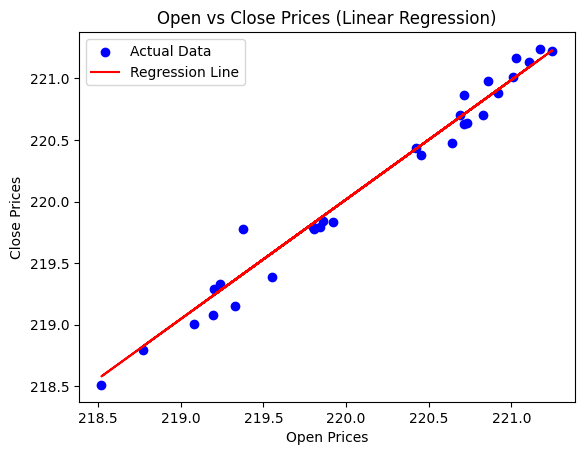

In [6]:
import matplotlib.pyplot as plt

# Scatter plot of actual Open and Close prices
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', label='Regression Line')

plt.title('Open vs Close Prices (Linear Regression)')
plt.xlabel('Open Prices')
plt.ylabel('Close Prices')
plt.legend()
plt.show()
